# Deep Neural Network Classifer for Touchalytics

-- Touchalytics uses users' touch data (up-down and left-right scrolling) when interacting with an app. It uses the collected touch data for user authentication. The system uses 30 behavioral features and data from 41 users. We downloaded touchalytics data from the link http://www.mariofrank.net/touchalytics/. We then cleaned the data by replacing 'NaN' and 'Infinity' by zero and dropped the 'doc id', 'phone id', and 'change of finger orientation' columns.

-- We use Touchalytics data to train a Deep Neural Network Classifer. The number of vectors in each Touchalytics profile varies around 300-1230. The number of vector in some profile is not suffeceint to train a Deep Neural Network Classifer. We used oversampling technique to increase their profile size.

-- We then estimat the accuracy of Deep Neural Network Classifer for Touchalytics data.

In [31]:
import csv
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

import warnings

In [32]:
#Read the normalized profile data
with open('Data/AllMargeTNorData.csv') as csvfile:
    DataNSet = list(csv.reader(csvfile, delimiter=','))
with open('Data/allUserIndxRP.csv') as csvfile:
    dataIndex = list(csv.reader(csvfile, delimiter=','))
print('Successfully read all data..')

Successfully read all data..


In [36]:
#Use dataframe and set column name
AllNDataSet = pd.DataFrame(DataNSet)
AllNDataSet=AllNDataSet[1:]
AllNDataSet=pd.concat([AllNDataSet.iloc[:,1:31], AllNDataSet.iloc[:,0:1]], axis=1, join='inner')
#print(AllNDataSet)
#print(dClass1.shape)
#print(dClass2.shape)
columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','ID']
AllNDataSet.columns= columns 
AllNDataSet.head() 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,ID
1,0.5000011873786407,0.006498745069917532,0.12030002586429865,0.08184426811816052,0.4790425730021504,0.20684197211795513,0.40342734074747966,0.98692,0.3333333333333333,0.5559768760351638,0.0961835467860379,0.03586765397855321,0.02713461726463975,0.846777208976157,0.27360910244786946,0.10612872390705001,0.018935337675524407,0.4638459649697168,0.7050138805348634,0.5775460518810888,0.1865308576738762,0.5458435480276354,0.055127493057308755,0.99509,0.037796848981683104,0.27314811423390756,0.5500945604825557,0.465107225531523,0.5,0.0,1
2,0.5000005097087379,0.006185012549300824,0.12781963962410553,0.3732611297218833,0.3956261208288585,0.3391415229148292,0.2795714895750172,0.98265,0.3333333333333333,0.4927616575359919,0.13617245716294984,0.033839371950766486,0.007142438165998632,0.8483821528751753,0.27376733998186764,0.10598683733753446,0.032601104534535276,0.4812127306316208,0.7119094989126914,0.5935518240514704,0.20399427852991017,0.4960560667324652,0.03871749558192376,0.98188,0.02786473677468938,0.2737682447869447,0.42155014919185735,0.27907940507934653,0.5,0.0,1
3,0.5000009334951456,0.039485478666188595,0.5112854556427279,0.5329398461108044,0.48460366981370323,0.5981512248818877,0.11328790776257404,0.73295,0.6666666666666666,0.8019811440947893,0.005422690450752606,0.0017998464548403873,6.660475119757552E-4,0.8484983436185134,0.27379864817951044,0.1059631752658527,9.217910299908369E-4,0.46314325468278655,0.704087817517235,0.5719899158130091,0.18524620542628595,0.7661975866789774,0.016818985104771523,0.91592,0.0019306007429230178,0.2738045679057117,0.37334599495784543,0.23255151974347923,0.5,0.0,1
4,0.500000454854369,0.009053424166367873,0.5545133201138029,0.2934126166875886,0.28438717818553483,0.24783090271367908,0.30309500380609344,0.75255,1.0,0.015336348579436845,0.08282055096493246,0.019677802818296636,0.005714634861667807,0.8483843267882188,0.27371514324569357,0.1059599184718393,0.01659897471457936,0.4840036947828731,0.7119094989126914,0.5944244940795327,0.2090195149505293,0.035674488204017946,0.04222166119666751,0.97614,0.020899449212245423,0.27373175249320036,0.5340265090712183,0.3720933153054348,0.5,0.0,1
5,0.49921,0.003944065973467192,0.40225881541512204,0.43313378223785304,0.1712962372462537,0.3503203221682084,0.26806037763873675,0.57212,1.0,0.0357529621607848,0.08840458190768566,0.0342207583149657,0.037554501906344705,0.8452655680224404,0.27360768812330005,0.11315478534856242,0.03329948735728968,0.4865713350326217,0.7119094989126914,0.5892975291460382,0.2142235017583499,0.06429685758858927,0.037997980308003027,0.95929,0.042369668246445495,0.27360768812330005,0.4938563805428751,0.4186002704184789,0.5,0.0,1


In [37]:
#Estimate the size of each profile in Touchalytics
AllNDataSet.groupby('ID').size()

ID
1      400
10     386
11     444
12     342
13     304
14     650
15     718
16     382
17     706
18     460
19     292
2     1230
20     356
21     702
22     374
23     968
24     434
25     432
26     242
27     608
28     710
29     438
3      758
30     224
31     370
32     304
33     712
34     612
35    1062
36     500
37     424
38     786
39     436
4      240
40     312
41     186
5      412
6      562
7      590
8      618
9      452
dtype: int64

In [38]:
# Replace the user name by class label and seperate the data in majority and minority class 
Identity=AllNDataSet['ID']
AllNDataSet=AllNDataSet.drop(['ID'], axis=1)

AllNT1DataSet, AllNT2DataSet,IDT1,IDT2 = train_test_split(AllNDataSet, Identity, test_size=0.1, random_state=22)
IDT1=IDT1.astype(int)
IDT2=IDT2.astype(int)

AllNT1DataSet=pd.concat([IDT1,AllNT1DataSet], axis=1, join='inner')
AllNT2DataSet=pd.concat([IDT2,AllNT2DataSet], axis=1, join='inner')

AllNT1DataSet = AllNT1DataSet.sort_values('ID')
AllNT2DataSet = AllNT2DataSet.sort_values('ID')

AllNT1DataSet.reset_index(drop=True, inplace=True)
AllNT2DataSet.reset_index(drop=True, inplace=True)


In [39]:
#print the size of majority and minority class
#print(AllNDataSet.shape)
#print(dfdataSet)
AllNT1DataSet.groupby('ID').size()

ID
1      359
2     1108
3      686
4      218
5      375
6      502
7      531
8      550
9      403
10     346
11     381
12     307
13     272
14     588
15     663
16     343
17     626
18     416
19     260
20     312
21     629
22     342
23     865
24     386
25     385
26     225
27     541
28     646
29     398
30     205
31     337
32     276
33     643
34     558
35     960
36     450
37     389
38     698
39     393
40     286
41     166
dtype: int64

In [40]:
#print the indices of all training proilfes 
DataIndex=AllNT1DataSet.groupby('ID').size().values
#print(DataIndex)
i=range(len(DataIndex)+1)
FDataIndex = array(i)

for i in range(len(DataIndex)):
  FDataIndex[i+1]=FDataIndex[i]+DataIndex[i]

print(FDataIndex)
#print(AllNT2DataSet[0:43])

[    0   359  1467  2153  2371  2746  3248  3779  4329  4732  5078  5459
  5766  6038  6626  7289  7632  8258  8674  8934  9246  9875 10217 11082
 11468 11853 12078 12619 13265 13663 13868 14205 14481 15124 15682 16642
 17092 17481 18179 18572 18858 19024]


In [41]:
# Oversampled the data of each training profile. We limit 2000 samples for minority (training profile) class
warnings.filterwarnings('ignore')

#Special line for normalized and non-normalized data
AllDataSet=AllNT1DataSet
length2 = len(AllDataSet)
print(length2)
#minClass=AllDataSet[0:1]
#majClass=AllDataSet[0:1]

for indx in range(0,41):
  index1=int(float(FDataIndex[indx]))
  name=AllDataSet.at[index1,'ID']
  #print(name)
  
  index2=int(float(FDataIndex[indx+1]))
  minClass=AllDataSet[index1:index2]
  majClass=AllDataSet[0:index1].append(AllDataSet[index2:length2])
  #print(majClass)
  index1=index2
  #print(len(minClass))
  #print(len(majClass))
  #print(len(minClass[0]))

  #join majority and minority class in single class
  dfminClass = pd.DataFrame(minClass)
  dfmajClass = pd.DataFrame(majClass)

  #df.rename(columns={'0':'ID'})
  dfminClass["ID"]=0
  dfmajClass["ID"]=1
  
  #print(dfminClass)
  #print("User %s has %s samples" %(name,len(dfminClass)))
  #Class=dfminClass.append(dfmajClass.sample(n=1000))
  if(len(dfminClass)>=2000):
      Class=dfminClass
      columns=Class.columns.tolist()
      columns=[c for c in columns if c not in ["ID"]]
      target="ID"
      state=np.random.RandomState(42)
      X=Class[columns]
      Y=Class[target]
      FClass=np.column_stack((X,Y))
    
      dFClass = pd.DataFrame(FClass)
      dFClass.columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','ID']
      dFClass=dFClass.replace({'ID':{0:name}})
      dFClass.reindex(np.random.permutation(dFClass.index))
      AllClass=pd.concat([AllClass,dFClass.sample(n=2000)]) 
      
  if(len(dfminClass)<2000): 
    #print(indx+1)
    Class=dfminClass.append(dfmajClass.sample(n=2000))
    #print(len(dfminClass))
    #print(len(Class))
    #print(len(Class))
    columns=Class.columns.tolist()
    columns=[c for c in columns if c not in ["ID"]]
    target="ID"
    state=np.random.RandomState(42)
    X=Class[columns]
    Y=Class[target]
    
    #print(FClass)
    #sns.countplot('ID', data = Class)
    smk=SMOTETomek(random_state=42)
    X_res,y_res=smk.fit_sample(X,Y)
    
    #ada=ADASYN(random_state=42)
    #X_res,y_res = ada.fit_resample(X,Y)
    #print(X_res.shape,' ',y_res.shape)
    #FClass=np.concatenate((y_res,X_res),axis=1)
    #print(FClass.shape)
    #print(X_res.shape,y_res.shape)
    FClass=np.column_stack((X_res,y_res))
    
    dFClass = pd.DataFrame(FClass)
    dFClass.columns=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19','F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','ID']
    dFClass=dFClass[dFClass['ID'] != 1]
    dFClass=dFClass.replace({'ID':{0:name}})
    dFClass.reindex(np.random.permutation(dFClass.index))
    if(len(dFClass)<2000):
      diff=2000-len(dFClass)
      dFClass=pd.concat([dFClass,dFClass.sample(n=diff)])

    if indx==0:
      AllClass=dFClass
    else:
      AllClass=pd.concat([AllClass,dFClass])

AllClass.index = range(AllClass.shape[0])

19024


In [43]:
#print the size of the oversampled data
#print(AllClass)
#print(dfdataSet)
AllClass.groupby('ID').size()

ID
1.0     2000
2.0     2000
3.0     2000
4.0     2000
5.0     2000
6.0     2000
7.0     2000
8.0     2000
9.0     2000
10.0    2000
11.0    2000
12.0    2000
13.0    2000
14.0    2000
15.0    2000
16.0    2000
17.0    2000
18.0    2000
19.0    2000
20.0    2000
21.0    2000
22.0    2000
23.0    2000
24.0    2000
25.0    2000
26.0    2000
27.0    2000
28.0    2000
29.0    2000
30.0    2000
31.0    2000
32.0    2000
33.0    2000
34.0    2000
35.0    2000
36.0    2000
37.0    2000
38.0    2000
39.0    2000
40.0    2000
41.0    2000
dtype: int64

In [44]:
#Seperate the class label and data of each profile
import numpy as np
import random
from sklearn.utils import shuffle

dfdataSet=AllClass

columnsN=['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','F11','F12','F13','F14','F15','F16','F17','F18','F19',
            'F20','F21','F22','F23','F24','F25','F26','F27','F28','F29','F30','ID']

fdataSet = pd.DataFrame(columns = columnsN)

#print(fdataSet)
for i in range (0,41):
  #fdataSet=fdataSet.append(shuffle(dfdataSet[1000*(i-1):i*1000]),ignore_index = True)
  fdataSet=fdataSet.append(dfdataSet[2000*i+1:(i+1)*2000+1])

fDataSet=fdataSet.drop(columns=['ID'])
#fDataSet=standardize(fDataSet,columns=columnsF)

fIDSet = pd.DataFrame(columns = ['ID'])
fIDSet=fdataSet['ID']
for i in range (0,41):
  fIDSet[2000*i:(i+1)*2000]=i

#fDataSet['ID'] = fIDSet

In [45]:
#install tensorflow
!pip install tensorflow

In [48]:
#Seperate the oversampled data in [tranning set, validation set and test set] of all users
from tensorflow.keras.utils import to_categorical

X=fDataSet
y=fIDSet

#print(y1.shape)
#print(X2)
#print(y2)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=22)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)


In [49]:
#import necessary packages for deep neural network
from keras.layers import Dense, Dropout, Input,Activation,Dropout, Flatten
from keras.models import Model,Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import torch.nn.functional as F

In [50]:
#define the optimizers
from keras.optimizers import SGD, RMSprop, Adam
def adam_optimizer():
    return Adam(lr=0.0002, beta_1=0.5)

def RMSprop_optimizer():
    return RMSprop(lr=0.001, rho=0.9)

In [51]:
#Construct a classifier for the initial experiments

def create_classifier(release=False,Tuser=41):
  classifier = Sequential()
  classifier.add(Dense(64, input_dim=30))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  #classifier.add(Dense(512))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('tanh'))

  #classifier.add(Dense(512))
  #classifier.add(BatchNormalization())
  #classifier.add(Activation('tanh'))

  classifier.add(Dense(256))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(128))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(64))
  classifier.add(BatchNormalization())
  classifier.add(Activation('relu'))

  classifier.add(Dense(Tuser, activation='softmax'))
  
  #np.log_softmax_v2(a, axis=axis)
  #classifier.add(F.softmax(a, dim=1))

  #classifier.compile(loss='categorical_crossentropy', optimizer=RMSprop_optimizer(),metrics=['accuracy'])
  return classifier

Clasf=create_classifier()
Clasf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3

In [52]:
# Train the Neural Network Classifer
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5,min_lr=0.0001)
callbacks_list = [learning_rate_reduction]

Classfier= create_classifier(True,41)

#------Comment will start from here
lossc='categorical_crossentropy'
optimizerc=RMSprop(lr=0.001, rho=0.9)
Classfier.compile(loss=lossc, optimizer='Adam',metrics=['accuracy'])
#------Comments will end from here
history1 =  Classfier.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_val, y_val),verbose=1, callbacks=callbacks_list)

Epoch 1/100
1154/1154 [==============================] - 23s 6ms/step - loss: 1.8506 - accuracy: 0.5096 - val_loss: 1.0741 - val_accuracy: 0.6650
Epoch 2/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.8210 - accuracy: 0.7411 - val_loss: 0.8045 - val_accuracy: 0.7398
Epoch 3/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.6751 - accuracy: 0.7833 - val_loss: 0.6624 - val_accuracy: 0.7907
Epoch 4/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.5883 - accuracy: 0.8101 - val_loss: 0.6402 - val_accuracy: 0.7932
Epoch 5/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.5300 - accuracy: 0.8270 - val_loss: 0.5409 - val_accuracy: 0.8228
Epoch 6/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.4984 - accuracy: 0.8373 - val_loss: 0.8298 - val_accuracy: 0.7434
Epoch 7/100
1154/1154 [==============================] - 6s 5ms/step - loss: 0.4622 - accuracy: 0.8481 - val_loss: 0.5480 - val_a

[Text(0, 0.5, 'accuracy'), Text(0.5, 0, 'epochs')]

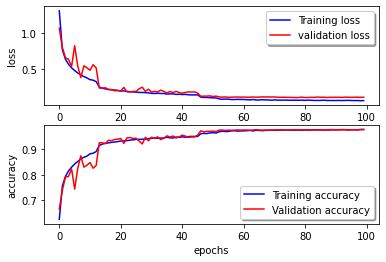

In [55]:
# Plot the classifier loss and accuracy curves for the training and validation data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history1.history['loss'], color='b', label="Training loss")
ax[0].plot(history1.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[0].set(xlabel='epochs', ylabel='loss')

ax[1].plot(history1.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history1.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
ax[1].set(xlabel='epochs', ylabel='accuracy')

In [57]:
#Calculate the accuracy for test data
y_test=AllNT2DataSet['ID']
X_test=AllNT2DataSet.drop(['ID'],axis=1).astype(float)
y_test=y_test.astype(int)-1
y_test = to_categorical(y_test)
#print(y_test)
Classfier.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])
loss, accuracy = Classfier.evaluate(X_test, y_test)
#print('Test score:', score)
print('Accuracy:', accuracy)
print('Loss:', loss)

67/67 [==============================] - 1s 1ms/step - loss: 1.5216 - accuracy: 0.7607
Accuracy: 0.7649006843566895
Loss: 1.4227142333984375
